In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('sappelli_data\sappelli_data.csv', sep=';')

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
C:\Users\alexi\AppData\Local\Temp\ipykernel_22164\2471882517.py:5: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv('sappelli_data\sappelli_data.csv', sep=';')


In [ ]:
data.head()

,mid,Act1A1,Act1A2,Act2A1,Act2A2,ReasA1,ReasA2,REA1,REA2,NumTA1,...,T3TyA1,T3TyA2,T3SubjA1,T3SubjA2,sender,date,message_id,subject,body,folder
0,103944,greet,greet,{},{},personal,personal,accountable non-answer,ignore,0,...,NaN,NaN,{},{},tana.jones@enron.com,2000-10-10,<13973474.1075847200439.JavaMail.evans@thyme>,Re: HOTDOG !This is sooo adorable!,It was cute!\tGenia FitzGerald\t10/10/2000 03:...,Tanya_Jones_Dec2000Notes FoldersSent
1,33081,deliver,request,{},{},administrative procedure,internal collaboration,accountable non-answer,postponed reply,1,...,NaN,NaN,{},{},richard.b.sanders@enron.com,2001-02-28,<7857698.1075853272620.JavaMail.evans@thyme>,Re: HEOF,"Frankly, I don t remember it. Ask Linda.\tAndr...",Richard_Sanders_Oct2001Notes FoldersSent
2,103941,deliver,deliver,{},propose,personal,personal,accountable non-answer,ignore,0,...,NaN,NaN,{},{},tana.jones@enron.com,2000-10-10,<10528202.1075847200508.JavaMail.evans@thyme>,Re: HOTDOG !This is sooo adorable!,"It s really all Genia s fault, she goes to lun...",Tanya_Jones_Dec2000Notes FoldersSent
3,103860,deliver,remind,{},{},administrative procedure,legal procedure,immediate reply,immediate reply,1,...,NaN,NaN,{},{},tana.jones@enron.com,2000-10-18,<23700686.1075847202393.JavaMail.evans@thyme>,Re: EnronOnline LLC and Enron North America Corp.,JustinI ve been running around trying to deter...,Tanya_Jones_Dec2000Notes FoldersSent
4,321253,commit,deliver,{},{},employment arrangements,personal,postponed reply,ignore,1,...,NaN,NaN,{},{},j.kaminski@enron.com,2001-07-23,<30497387.1075863431760.JavaMail.evans@thyme>,RE: Christian,"Paul, I hope you feel better. I have seen the ...","VKAMINS (Non-Privileged)Kaminski, Vince JSent ..."


In [ ]:
# Keep only body, NumTA1 and NumTA2 columns

numta = data[['NumTA1','NumTA2', 'body']]
numta.head()

,NumTA1,NumTA2,body
0,0,0,It was cute!\tGenia FitzGerald\t10/10/2000 03:...
1,1,1,"Frankly, I don t remember it. Ask Linda.\tAndr..."
2,0,0,"It s really all Genia s fault, she goes to lun..."
3,1,2,JustinI ve been running around trying to deter...
4,1,0,"Paul, I hope you feel better. I have seen the ..."


In [ ]:
numta.describe()

,NumTA1,NumTA2,body
count,1144,1144,1144
unique,11,5,1063
top,0,0,We have received an executed Fourth Amendment ...
freq,563,551,6


In [ ]:
# only keep rows where NumTA1 and NumTA2 have the same value

numta = numta[numta['NumTA1'] == numta['NumTA2']]
numta = numta.drop(['NumTA2'], axis=1)
numta = numta.rename(columns={'NumTA1': 'NumTA'})
numta.describe()


,NumTA,body
count,723,723
unique,4,686
top,0,We have received an executed Amendment Agreeme...
freq,380,4


In [ ]:
# remove rows with non numeric values in NumTA1 and NumTA2

numta = numta[numta['NumTA'].apply(lambda x: x.isnumeric())]
numta.describe()

,NumTA,body
count,723,723
unique,4,686
top,0,We have received an executed Amendment Agreeme...
freq,380,4


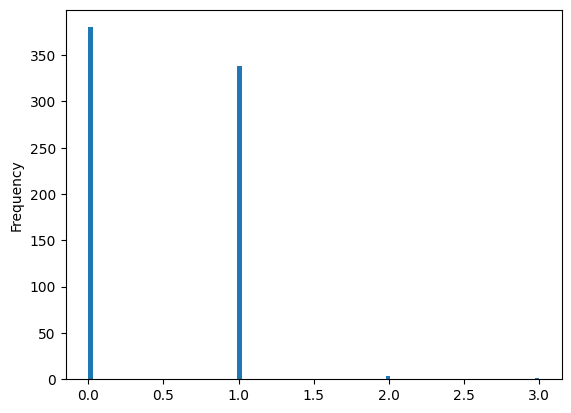

In [ ]:
# plot histogram of NumTA1

numta['NumTA'] = numta['NumTA'].astype(int)
numta['NumTA'].plot.hist(bins=100)
plt.show()

In [ ]:
# save to csv

numta.to_csv('sappelli_data\sappelli_data_numta.csv', index=False)

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\alexi\AppData\Local\Temp\ipykernel_22164\645230214.py:3: SyntaxWarning: invalid escape sequence '\s'
  numta.to_csv('sappelli_data\sappelli_data_numta.csv', index=False)
